### Парная линейная регрессия

#### Цель работы

Познакомиться с основными понятиями задачи регрессии и метода градиентного спуска.

#### Содержание работы

1. Загрузить данные из тектовых файлов.
2. Создать и построить модель парной линейной регрессии с использованием метода градиентного спуска.
3. Оценить на графике качество построенной модели.
4. Построить кривые обучения.


#### 1. Загрузить данные из тектовых файлов.

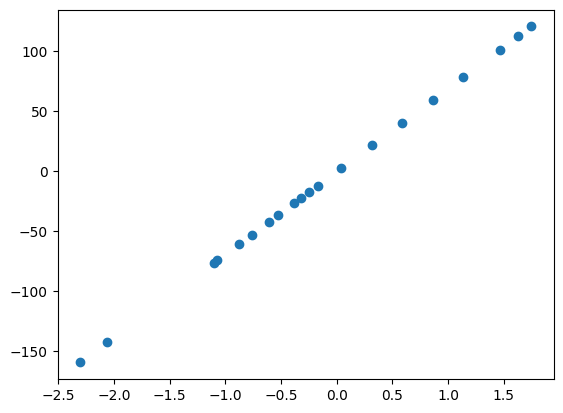

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

x.head()
plt.figure()
plt.scatter(x, y)
plt.show()

#### 2. Создать и построить модель парной линейной регрессии с использованием метода градиентного спуска.

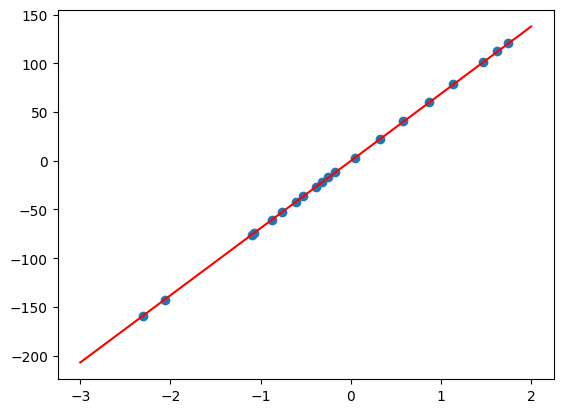

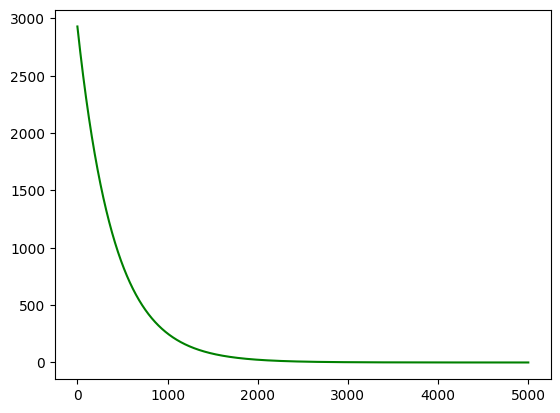

Last error:  0.03937321303112905


In [5]:
class Model:
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    def predict(self, x):
        """Метод предсказания результата"""
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):
        """Функция ошибки"""
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

hyp = Model()
steps, errors = hyp.fit(x, y)

def draw_regression(model: Model, X0, x, y):
    Y0 = model.predict(X0)
    plt.figure()
    plt.scatter(x, y)
    plt.plot(X0, Y0, 'r')
    plt.show()

def draw_errors(steps, errors):
    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.show()

X0 = np.linspace(-3, 2, 100)
draw_regression(hyp, X0, x, y)
draw_errors(steps, errors)
print("Last error: ", errors[-1])

#### Задания для самостоятельного выполнения

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму. 
2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится. 
3. Модифицируйте код модели таким образом, чтобы он корректно работал как с _Series_, так и с _DataFrame_. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.
4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например. 
5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов. 
6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр _alpha_ можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.
7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.



#### 1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму. 

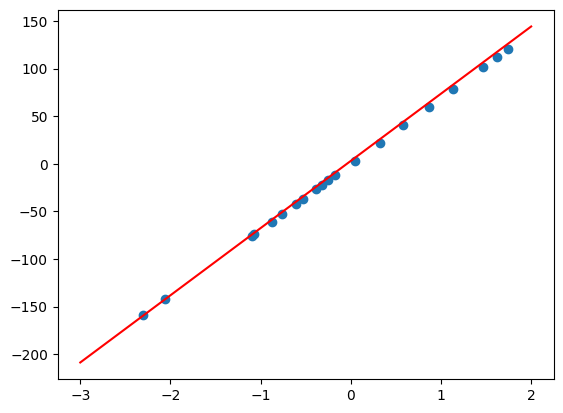

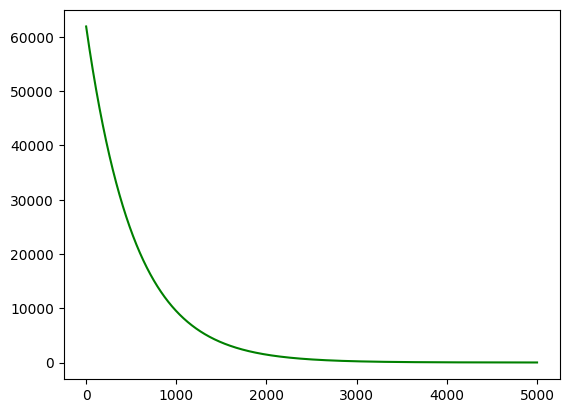

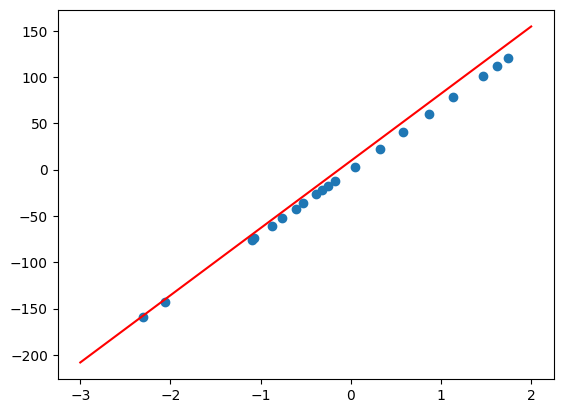

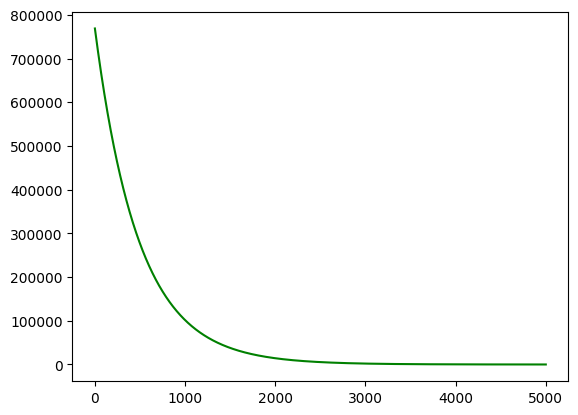

In [11]:
class Model1:
    """Модель парной линейной регрессии (задаем разные начальные значения параметров)"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    
    def predict(self, x):
        """Метод предсказания результата"""
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):
        """Функция ошибки"""
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

model1_1 = Model1(324, 234)
steps, errors = model1_1.fit(x, y)

X0 = np.linspace(-3, 2, 100)
draw_regression(model1_1, X0, x, y)
draw_errors(steps, errors)

model1_2 = Model1(1232, 12)
steps, errors = model1_2.fit(x, y)

X0 = np.linspace(-3, 2, 100)
draw_regression(model1_2, X0, x, y)
draw_errors(steps, errors)


#### 2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится. 

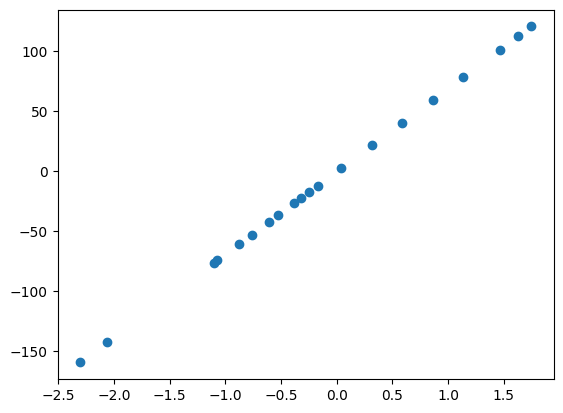

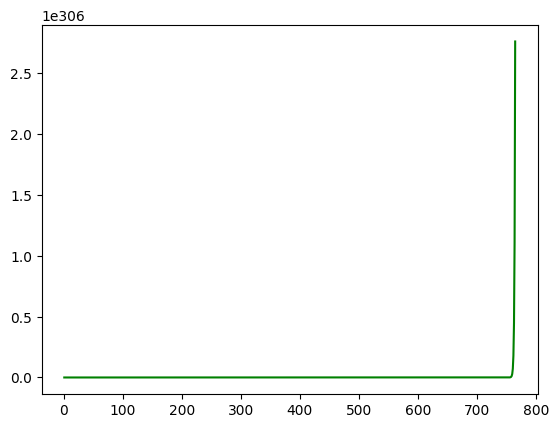

In [18]:
class Model2:
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    
    def predict(self, x):
        """Метод предсказания результата"""
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):
        """Функция ошибки"""
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

model2_1 = Model2()
steps, errors = model2_1.fit(x, y, 2)

X0 = np.linspace(-3, 2, 100)
draw_regression(model2_1, X0, x, y)
draw_errors(steps, errors)



#### 3. Модифицируйте код модели таким образом, чтобы он корректно работал как с _Series_, так и с _DataFrame_. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [ ]:
class Model3:
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def _to_series(self, data, name):
        if isinstance(data, pd.DataFrame):
            if data.shape[1] != 1:
                raise ValueError(f"{name} должен содержать только один столбец")
            return data.iloc[:, 0]
        elif isinstance(data, pd.Series):
            return data
        else:
            return pd.Series(data)

    def predict(self, x):
        x = self._to_series(x, "x")
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        X = self._to_series(X, "X")
        Y = self._to_series(Y, "Y")
        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        X = self._to_series(X, "X")
        Y = self._to_series(Y, "Y")

        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            preds = self.predict(X)
            dJ0 = sum(preds - Y) / len(X)
            dJ1 = sum((preds - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

#### 4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например. 

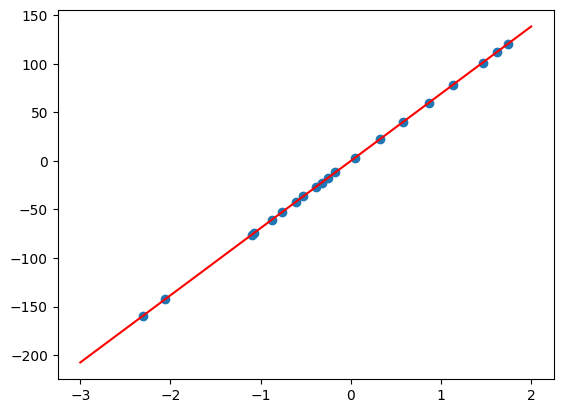

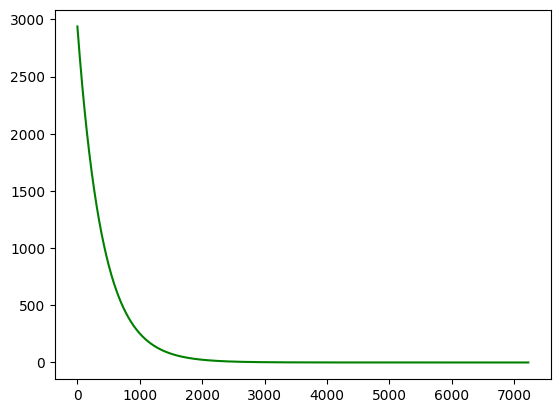

In [23]:

def draw_errors(errors):
    plt.figure()
    plt.plot(errors, 'g')
    plt.show()


class Model4:
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    
    def predict(self, x):
        """Метод предсказания результата"""
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):
        """Функция ошибки"""
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        errors = [self.error(X, Y)]
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            old_err = errors[-1]
            new_err = self.error(X, Y)

            errors.append(new_err)
            if old_err - new_err < 0.000001:
                # заканчиваем цикл если разница между текущей и прошлой ошибки меньше одной миллионной
                break 

        return errors

model4_1 = Model4()
errors = model4_1.fit(x, y,  max_steps=100000000)

X0 = np.linspace(-3, 2, 100)
draw_regression(model4_1, X0, x, y)
draw_errors(errors)

#### 5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов. 

Внимание! Модель достигла максимального значения количества шагов градиентного спуска!


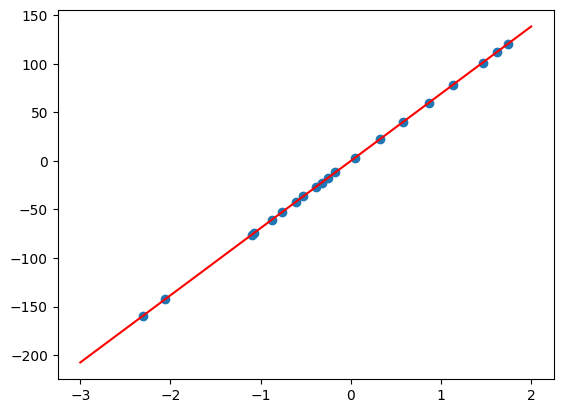

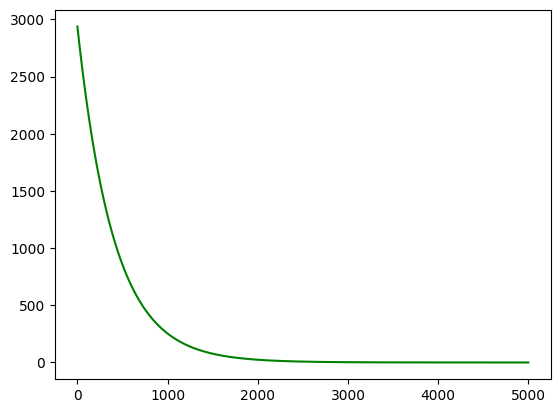

In [24]:
class Model5:
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    
    def predict(self, x):
        """Метод предсказания результата"""
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):
        """Функция ошибки"""
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        errors = [self.error(X, Y)]
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            old_err = errors[-1]
            new_err = self.error(X, Y)

            errors.append(new_err)
            if old_err - new_err < 0.000001:
                # заканчиваем цикл если разница между текущей и прошлой ошибки меньше одной миллионной
                break
        else:
            print('Внимание! Модель достигла максимального значения количества шагов градиентного спуска!')

        return errors

model5_1 = Model5()
errors = model5_1.fit(x, y)

X0 = np.linspace(-3, 2, 100)
draw_regression(model4_1, X0, x, y)
draw_errors(errors)

#### 6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр _alpha_ можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

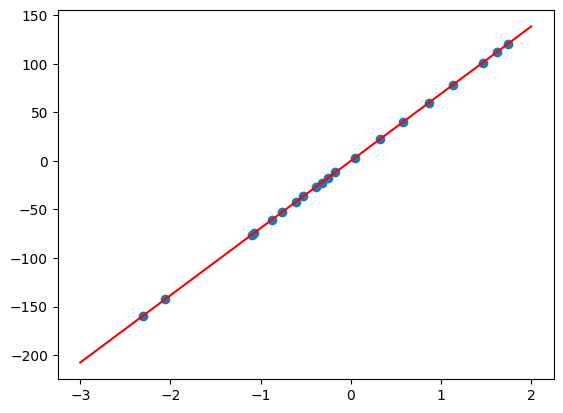

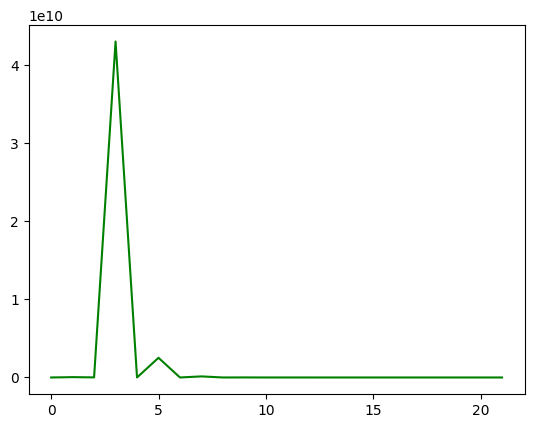

In [39]:
class Model6:
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    
    def predict(self, x):
        """Метод предсказания результата"""
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):
        """Функция ошибки"""
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        errors = [self.error(X, Y)]
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            old_err = errors[-1]
            new_err = self.error(X, Y)

            if new_err > old_err:
                alpha /= 2
                self.__init__()
            if abs(old_err - new_err) < 0.000001:
                # заканчиваем цикл если разница между текущей и прошлой ошибки меньше одной миллионной
                break

            errors.append(new_err)

        else:
            print('Внимание! Модель достигла максимального значения количества шагов градиентного спуска!')

        return errors


model6_1 = Model6()
errors = model6_1.fit(x, y, alpha=100)

X0 = np.linspace(-3, 2, 100)
draw_regression(model6_1, X0, x, y)
draw_errors(errors)


#### 7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

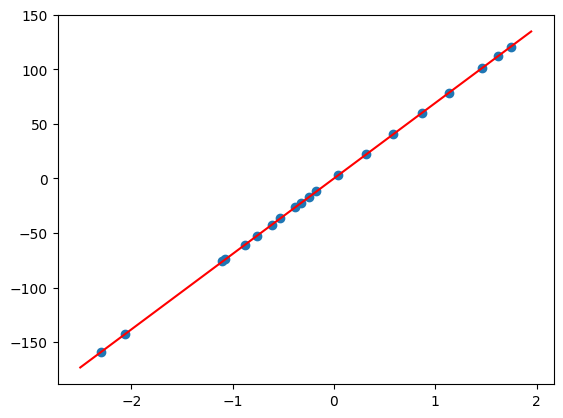

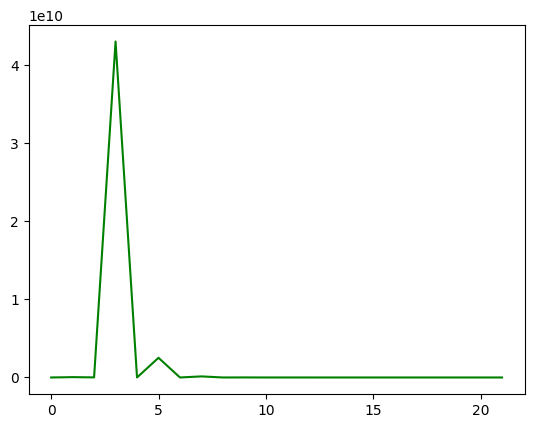

In [50]:
class Model7:
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    
    def predict(self, x):
        """Метод предсказания результата"""
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):
        """Функция ошибки"""
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        errors = [self.error(X, Y)]
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            old_err = errors[-1]
            new_err = self.error(X, Y)

            if new_err > old_err:
                alpha /= 2
                self.__init__()
            if abs(old_err - new_err) < 0.000001:
                # заканчиваем цикл если разница между текущей и прошлой ошибки меньше одной миллионной
                break

            errors.append(new_err)

        else:
            print('Внимание! Модель достигла максимального значения количества шагов градиентного спуска!')
        return errors
    
    def draw_figures(self, x, y, errors):
        x_min, x_max = x.min(), x.max()
        margin = (x_max - x_min) * 0.05
        X0 = np.linspace(x_min - margin, x_max + margin, int(x_max - x_min)*100)
        Y0 = self.predict(X0)
        plt.figure()
        plt.scatter(x, y)
        plt.plot(X0, Y0, 'r')
        plt.show()

        plt.figure()
        plt.plot(errors, 'g')
        plt.show()

model7_1 = Model7()
errors = model7_1.fit(x, y, alpha=100)

model7_1.draw_figures(x, y, errors)

#### Контрольные вопросы

1. Сформулируйте, в чем состоит задача регрессии, придумайте несколько примеров.
2. Что такое метод градиентного спуска?
2. Что такое скорость обучения в методе градиентного спуска?
3. Какие функции ошибки используются в регрессионных моделях и почему именно такие?
4. Что показывает конкретное значение ошибки регрессии?
5. Что показывает график обучения и зачем его строить?


#### Дополнительные задания:

1. Изучите официальную документацию библиотеки [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Постройте модель регрессии с использованием библиотечных средств на тех же данных. Постройте графики и сравните результаты.
2. Почитайте в документации про встроенный метод оценки качества регрессии score. Используйте его для оценки качетсва модели. Реализуйте такой же расчет в собственном классе модели.
3. (\*) Реализуйте нормирование входных значений. Это нужно делать внутри класса модели. Лучше всего - внутри метода обучения. Необходимо привести значения признаков к шкале [0; 1]. Подумайте, как теперь корректно считать теоретические значения.

#### 1. Изучите официальную документацию библиотеки [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Постройте модель регрессии с использованием библиотечных средств на тех же данных. Постройте графики и сравните результаты.

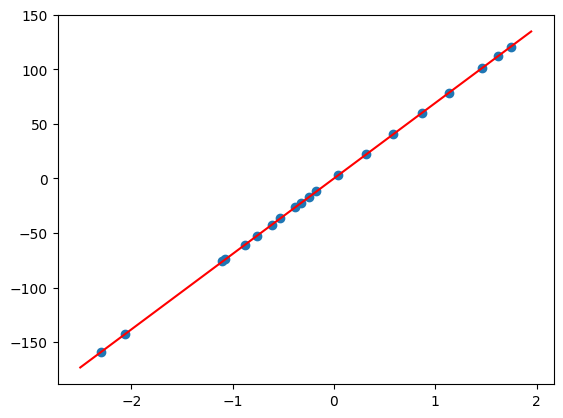

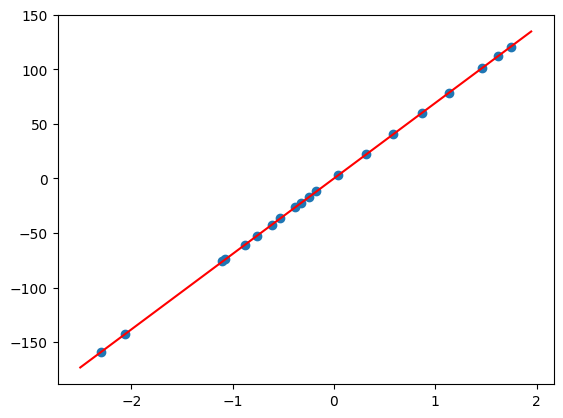

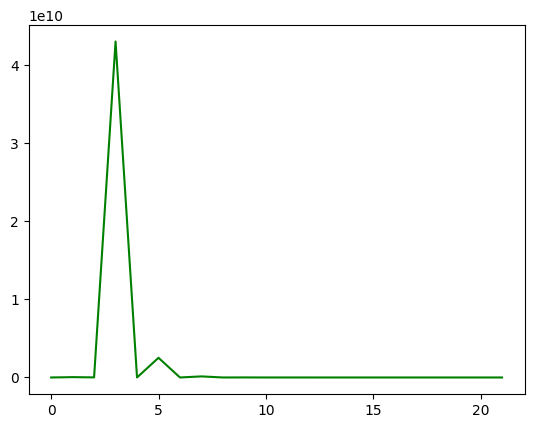

Параметры sklearn: b0: 0.0, b1: [69.1877114]
Параметры Model7 (своя модель): b0: -0.000180605203893007, b1: 69.18762802794734


In [55]:
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
X = x.values.reshape(-1, 1)
Y = y.values
sk_model.fit(X, Y)

x_min, x_max = x.min(), x.max()
margin = (x_max - x_min) * 0.05
X0 = np.linspace(x_min - margin, x_max + margin, int(x_max - x_min)*100)
y_pred = sk_model.predict(X0.reshape(-1, 1))
plt.figure()
plt.scatter(x, y)
plt.plot(X0, y_pred, 'r')
plt.show()


model7_2 = Model7()
errors = model7_2.fit(x, y, alpha=100)
model7_2.draw_figures(x, y, errors)

print(f"Параметры sklearn: b0: {sk_model.intercept_}, b1: {sk_model.coef_}")
print(f"Параметры Model7 (своя модель): b0: {model7_2.b0}, b1: {model7_2.b1}")